# Linear Regression
Stanford CS229 - Machine Learning by Andrew Ng. Programming exercise 1.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

## Linear Regression with a single variable

여러분들은 푸드 트럭의 수익을 예측하는 선형 회귀 모델을 만들어 보게 될것입니다. 이 선형 모델은 하나의 변수만 사용합니다. 

여러분들은 레스토랑 프렌차이즈의 CEO 이며, 새로운 지점을 확장하기 위해 어떤 도시를 선택할지 고민하고 있습니다. 이미 여러 도시에 많은 푸드 트럭이 존재하므로, 여러분들은 그 도시들로 부터 인구에 따른 수익 데이터를 확인할 수 있습니다. 이 데이터를 활용해서 다음에 어느 도시에 새로운 지점을 확장하면 좋을지 결정해보세요.

In [ ]:
# 데이터를 불러오는 것 부터 시작합시다.
!wget -nc /resources/data/ex1data1.txt https://raw.githubusercontent.com/rickwierenga/CS229-Python/master/ex1/ex1data1.txt
data = pd.read_csv('/content/ex1data1.txt', header=None, names=['Population', 'Profit'])

# 유용한 변수들을 초기화 합니다.
m = len(data)     # 학습 examples의 총 개수
X = np.append(np.ones((m, 1)), np.array(data["Population"]).reshape((m,1)), axis=1) # X 에 1로 구성된 벡터 x0를 추가합니다.
y = np.array(data["Profit"]).reshape(m, 1)

data.head()

/resources/data/ex1data1.txt: Scheme missing.
File ‘ex1data1.txt’ already there; not retrieving.



,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## 데이터 시각화

Plotting은 여러분들이 사용하는 데이터에 대한 통찰력을 얻게 도와줍니다. `bx` 옵션을 이용하면, 데이터를 파란색 x 표시로 plot 할 수 있습니다. 

Text(0.5, 1.0, 'Relation between profit and population')

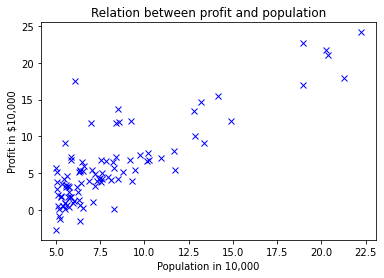

In [ ]:
plt.plot(data['Population'], data['Profit'], 'bx')
plt.xlabel('Population in 10,000')
plt.ylabel('Profit in $10,000')
plt.title('Relation between profit and population')

## 가설(hypotheses) 함수

가장 일반적인 선형 함수는 다음과 같습니다: $y = h_\theta(x) = \theta_0 + \theta_1 x$. 이 선형 함수는 말 그대로 일직선에 대한 방정식을 의미합니다.

우리는 예측 값 $y$ 를 얻기 위해 $\theta_0$ 와 $\theta_1$ 를 $h_\theta(x)$ 에 적용할 것입니다. 
즉, 입력 데이터 ($x$)를 출력 데이터 ($y$) 에 mapping 하려는 $h_\theta(x)$ 함수를 만들려 합니다.

## Cost function (비용 함수)
비용 함수는 우리가 정한 가설 $h_\theta$ 가 얼마나 정답과 먼지 알려줍니다. 비용 함수 중 하나인 Mean Square Error (MSE)는 우리가 예측한 값들과 실제 값들에 대한 거리(또는 차이)를 제곱한 뒤, 평균을 구합니다. 공식은 다음과 같습니다: 

$$
J\left(\theta \right)=\frac{1}{2 m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}
$$

### Vectorization (벡터화)

Vectorization 은 matrix 연산을 통해 loops(`for` 또는 `while`)을 대신하는 행위(act)입니다. `numpy`를 이용하면, vectorization을 쉽게 수행할 수 있습니다.  Mathematically, the 'regular' function should mean the same as the vectorized function.

다음의 예시는 matrix 곱에 대한 vectorization 예시 입니다.   
<image src="https://www.codedrome.com/wp-content/uploads/2019/06/matrix_multiplication2.png" width=50%>

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[7, 10], [8, 11], [9, 12]])

In [ ]:
# for loop 를 이용한 matrix 곱
result = np.zeros((2, 2))

# a 행렬의 행에 대해 반복
for i in range(len(a)):
   # b 행렬의 열에 대해 반복
   for j in range(len(b[0])):
       # b 행렬의 행에 대해 반복
       for k in range(len(b)):
           result[i][j] += a[i][k] * b[k][j]

result

array([[ 50.,  68.],
       [122., 167.]])

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[7, 10], [8, 11], [9, 12]])

a @ b

array([[ 50,  68],
       [122, 167]])

**연습**: 아래의 `cost_function` 을 작성하세요. 이 함수는 위에서 설명한 비용함수 $J(\theta)$ (MSE) 를 계산합니다. 

In [ ]:
def cost_function(X, y, theta):
  """ 입력값 X , 출력값 y, 그리고 linear regression에 사용되는 parameter theta를 이용하여 cost 값을 계산합니다.   """
  cost = 1/(2 * m) * np.sum( (X @ theta - y) ** 2 ) 
  return cost

여러분들이 `cost_function`을 잘 작성했다면,
$\theta=\left[\begin{array}{ll}
0 & 0
\end{array}\right]$ 의 경우, `cost_function` $J(\theta)$ 는 다음과 같은 값을 반환해야 합니다:
$$32.07273388$$


In [ ]:
initial_theta = np.zeros((2,1))
print(cost_function(X, y, initial_theta))

32.072733877455676


## Gradient descent

우리는 가설 함수 $h_\theta(x)$가 좋은 예측값을 출력하길 원합니다. 이를 위해, 여러분들은 비용 함수 $J(\theta)$를 최소화해야 합니다.
Gradient descent는 이를 위한 알고리즘 입니다.

linear regression을 위한 gradient descent의 정의는 아래와 같습니다.

$$
\text {repeat}\left\{
  \theta_{j}:=\theta_{j}-\alpha \frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}\right\}
$$

아래 그림은 단일 변수에 대한 gradient descent를 묘사한 그림입니다.

<img src="https://github.com/rickwierenga/CS229-Python/raw/02470f159b74dfc18c8beae25d1a50366d1394cd/ex1/notes/gradientdescent.png" width=50%>


**연습** : 아래의 `gradient_descent` 함수를 완성하세요.

Vectorization 힌트:
$$
\theta:=\theta-\frac{\alpha}{m} X^{T}(X \theta-\vec{y})
$$

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    """ theta를 학습하기 위해 gradient descent를 수행하세요.
    이 함수는 이전에 구현한 cost_function에 대한 기록 J_history와 
    theta에 대한 최종 학습 결과를 반환합니다.  
    """
    J_history = []

    for it in range(iterations):
      J_history.append(cost_function(X, y, theta))

      theta = theta - (alpha / m) * X.T @ ( X @ theta - y) 

    return theta, J_history

여러분들이 `gradient_descent`를 잘 작성하셨다면, 아래의 코드를 통해 `theta`는 다음과 같은 값을 가져야 합니다: 
$$
\theta=\left[\begin{array}{c}
-3.63029144 \\
1.16636235
\end{array}\right]
$$

In [ ]:
alpha = 0.01
iterations = 1500

theta, J_history = gradient_descent(X, y, initial_theta, alpha, iterations)
theta

array([[-3.63029144],
       [ 1.16636235]])

## 결과를 활용하기

### 완성된 선형 모델을 그려보기

아래와 비슷한 결과가 나와야 합니다.

<img src="https://i.loli.net/2020/12/19/vBfQXbFxygjD218.png" width=35%>

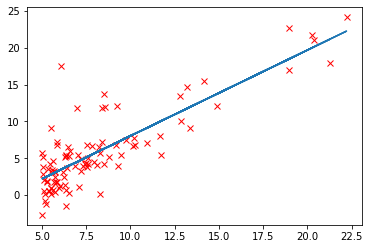

In [ ]:
plt.plot(X[:,1], y, 'rx', label='Training data')
plt.plot(X[:,1], X.dot(theta), label='Linear regression')

### cost 기록을 plotting 해보기

$J(\theta)$가 시간이 흐를수록 어떻게 줄어드는지 plot 해보세요. 모델이 학습하는 것을 확인할 수 있습니다.

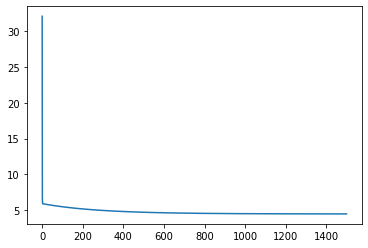

In [ ]:
plt.plot(J_history)

### 선형 모델을 활용하여 예측 해보기
이제 학습이 끝난 모델을 통해 얼마나 수익을 낼 수 있을지 확인해봅시다.

In [ ]:
prediction = np.array([1, 3.5]).dot(theta) * 10000 
'도시의 인구가 35000명 이라면, 우리는 %.2f 달러 만큼의 수익을 낼 수 있습니다!' % prediction

'도시의 인구가 35000명 이라면, 우리는 4519.77 달러 만큼의 수익을 낼 수 있습니다!'

# Multivariate Linear Regression

---
이 파트에서는, 집 가격을 예측하기 위해 여러분들은 다변수 선형 회귀를 구현하게 될것입니다. 여러분들이 보유한 집을 팔고싶다고 가정해보겠습니다. 그 집을 얼마에 내놓는 것이 좋을까요? 이를 아는 한가지 방법은 최근 다른 집들의 판매 가격 정보를 모으고, 이 정보들을 이용하여 예측 모델을 만드는 것입니다.

In [ ]:
# 데이터를 로드합니다.
!wget -nc /resources/data/ex1data2.txt https://raw.githubusercontent.com/rickwierenga/CS229-Python/master/ex1/ex1data2.txt
data = pd.read_csv("/content/ex1data2.txt", header = None, names=["Size", "Bedrooms","Price"])
m = len(data)

# X 와 y 그리고 theta를 초기화 합니다.
x0 = np.ones(m)
size = np.array((data["Size"]))
bedrooms = np.array((data["Bedrooms"]))
X = np.array([x0, size, bedrooms]).T
y = np.array(data["Price"]).reshape(len(data.index), 1)
theta_init = np.zeros((3,1))

data.head()

/resources/data/ex1data2.txt: Scheme missing.
File ‘ex1data2.txt’ already there; not retrieving.



,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### Feature Normalization

각 특징이 규모에 따라 다를 경우, feature scaling을 수행하면 gradient descent 이 훨씬 더 빠르게 수렴할 수 있습니다. Z-score는 feature scaling의 대표적 방법입니다. 공식은 다음과 같습니다:
$$
 x := \frac{x-\mu}{\sigma}
$$
여기서 $\mu$는 평균이고, $\sigma$는 표준 편차입니다.

**중요**: 이후에 완성된 모델을 통한 예측을 위해 $\mu$와 $\sigma$를 저장해두는 것이 중요합니다.

**연습**: 불러온 데이터를 z-score를 통해 feature normalization 하는 함수 `normalize`를 작성하세요. 

In [ ]:
# normalization 수행
def normalize(X):
    """ 
      input data X 의 특징들을 정규화 하세요.
      X 의 첫번째 특징은 bias를 위한 것이므로 정규화할 필요가 없습니다.
      힌트. for loop 를 이용해 두번째, 세번째 열(특징)에 대해서만 정규화를 수행하세요.
    """
    mu = np.ones(len(X))        # len(X[0]) 가 좀 더 정확
    sigma = np.ones(len(X))
    
    for i in range(len(X[0])):
        if i != 0:
            mu[i] = np.mean(X[:, i])
            sigma[i] = np.std(X[:, i])
            X[:, i] = (X[:, i] - mu[i]) / sigma[i]
            
    return X, mu, sigma

X, mu, sigma = normalize(X)
X[0:5]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

여러분들이 `normalize` 함수를 잘 구현했다면, 다음과 같은 결과가 나와야 합니다.
```
array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])
```

## Gradient Descent

변수의 개수에 상관없이 gradient descent의 공식은 다음과 같습니다.

$$
\text {repeat }\left\{\theta_{j}:=\theta_{j}-\alpha \frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}\right\}
$$

**연습**: 다변수를 위한 gradient descent 함수 `gradient_descent_multi`를 구현하세요. vectorization을 활용해야 하며 변수의 개수와 상관없이 gradient descent가 수행되어야 합니다.

Vectorization 힌트:
$$
\theta:=\theta-\frac{\alpha}{m} X^{T}(X \theta-\vec{y})
$$

In [ ]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    J_history = []

    for it in range(iterations):
      J_history.append(cost_function(X, y, theta))

      theta = theta - (alpha / m) * X.T @ ( X @ theta - y) 

    return theta, J_history

alpha = 0.01
iterations = 1500
initial_theta = np.zeros((3,1))
theta, J_history = gradient_descent_multi(X, y, initial_theta, alpha, iterations)
theta

array([[340412.56301439],
       [109370.05670466],
       [ -6500.61509507]])

여러분들이 `gradient_descent` 함수를 잘 구현했다면, 다음과 같은 결과가 나와야 합니다.

```
array([[340412.56301439],
       [109370.05670466],
       [ -6500.61509507]])
```

학습 횟수에 따라서 cost 가 어떻게 줄어드는지 확인해봅시다.

Text(0, 0.5, 'cost')

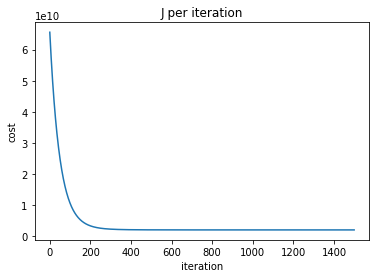

In [ ]:
plt.plot(J_history)
plt.title('J per iteration')
plt.xlabel('iteration')
plt.ylabel('cost')

만약 학습된 모델을 이용해서 예측 값을 얻고 싶다면, 입력 데이터를 normalization 하는 것을 잊지마세요.

In [ ]:
price = theta.transpose() @ np.array([1, (1650-mu[1])/sigma[1], (3-mu[2])/sigma[2]]) # normalize the input
'3개의 방과 1650 sqaure feet의 집이라면, 이 집의 가격은 %.2f 달러로 예측할 수 있겠군.' % price

'3개의 방과 1650 sqaure feet의 집이라면, 이 집의 가격은 293098.47 달러로 예측할 수 있겠군.'

# Logistic Regression

Logistic Regression은 주어진 데이터가 속한 카테고리를 예측하는 방법입니다. Binary Logistic Regression에서는 오직 두개의 카테고리만 존재합니다.

$$
y \in\{0,1\}
$$

이번 연습에서 여러분은 직접 logistic regression을 구현해볼 것입니다. 여러분들은 학생들이 얻은 두 시험 성적(Exam 1, Exam 2)을 통해, 학교의 입학을 허락할 것인지(Accepted) 또는 불허할 것인지 (Not Accepted) 정하는 모델을 만들어야 합니다. 

In [ ]:
# 먼저 학습에 필요한 데이터를 불러옵니다.
!wget -nc /resources/data/ex2data1.txt https://raw.githubusercontent.com/rickwierenga/CS229-Python/master/ex2/ex2data1.txt
data = pd.read_csv("ex2data1.txt", header = None, 
                   names = ["Exam 1 Score", "Exam 2 Score", "Accepted"])

# 몇가지 유용한 변수들을 초기화 합니다.
m = len(data["Accepted"])
x0 = np.ones(m)

size = np.array((data["Exam 1 Score"]))
bedrooms = np.array((data["Exam 2 Score"]))

X = np.array([x0, size, bedrooms]).T
y = np.array(data["Accepted"]).reshape((m,1))
m, n = X.shape

data.head()

/resources/data/ex2data1.txt: Scheme missing.
File ‘ex2data1.txt’ already there; not retrieving.



,Exam 1 Score,Exam 2 Score,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### 데이터 시각화 하기
파란색 십자가는 합격된 학생을 의미하고, 노란색 원은 탈락한 학생을 의미합니다.

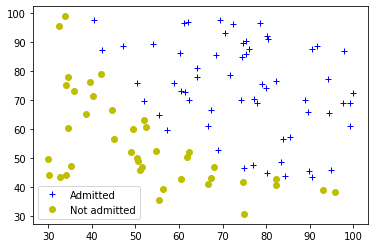

In [ ]:
# positive 그리고 negative 샘플들의 인덱스를 찾습니다. 
pos = np.where(y==1)[0]
neg = np.where(y==0)[0]

# examples들을 plot 해봅니다.
plt.plot(X[pos, 1], X[pos, 2], 'b+', label='Admitted')
plt.plot(X[neg, 1], X[neg, 2], 'yo', label='Not admitted')
plt.legend()
plt.show()

### Sigmoid

시그모이드 함수, 또는 로지스틱 함수는 0과 1 사이의 값을 가지는 함수입니다. 

<img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F275BAD4F577B669920">

이 시그모이드 함수를 통해서 우리 만들 모델 $h_\theta(x)$ 는 다음과 같습니다.


$$
h_{\theta}(x)=g\left(\theta^{T} x\right)=g(z)=\frac{1}{1+e^{-z}}=\frac{1}{1+e^{-\theta T_{x}}}
$$

**연습** : 시그모이드 함수 `sigmoid`를 구현하세요. 

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## 비용 함수와 Gradient 계산

### 비용 함수

Logistic regression의 비용함수는 binary cross-entropy로, linear regression과 다릅니다. Binary Cross-entropy는 다음과 같이 계산됩니다:

$$
J(\theta)=-\frac{1}{m}\left[\sum_{i=1}^{m} y^{(i)} \log h_{\theta}\left(x^{(i)}\right)+\left(1-y^{(i)}\right) \log \left(1-h_{\theta}\left(x^{(i)}\right)\right)\right]
$$

**연습** : Binary cross-entropy 비용 함수 `compute_cost`를 구현하세요. Vectorization을 활용해야 합니다. 


In [ ]:
def compute_cost(theta, X, y):
    cost = - 1/ m * np.sum( y * np.log( sigmoid(X @ theta)) + (1 - y) * np.log(1 - sigmoid(X @ theta)))
    return cost

### Gradient

gradient는 gradient descent에서 cost function을 parameter에 대해 미분한 값, 즉, cost function이 최소가 되는 방향을 수치화한 결과입니다. Linear regression에서는 gradient descent를 수행했습니다. 이번에는 conjugate gradient라는 알고리즘을 수행해볼 것입니다. 걱정마세요, 이 알고리즘은 여러분이 직접 구현할 필요는 없습니다. 다만, conjugate gradient 알고리즘은 gradient를 계산하는 함수가 필요합니다.

Logistic regression에서 gradient는 다음과 같습니다.

$$
\frac{\partial}{\partial \theta_{j}} J(\theta)=\frac{1}{m} \sum_{i=1}^{m}\left[\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right] x_{j}^{(i)}\right.

$$


**연습**: gradient를 계산하는 함수 `compute_gradient`를 작성하세요. Vectorization을 활용해야 합니다.

Vectorization 힌트

$$
\frac{\partial}{\partial \theta_{j}} J(\theta)=\frac{1}{m} \cdot X^{T} \cdot(g(X \cdot \theta)-\vec{y})
$$ 

In [ ]:
def compute_gradient(theta, X, y):
    graident = 1/m * X.T.dot(sigmoid( X @ theta) - y)
    return graident

여러분들이 `compute_cost`와 `compute_gradient` 함수를 잘 구현했다면, 다음과 같은 결과가 나와야 합니다.

$$
J \approx 0.6931471805599453 
$$
$$
\frac{\partial}{\partial \theta_{j}} J(\theta) \approx\left[\begin{array}{lll}
-0.1000 & -12.00921659 & -11.26284221
\end{array}\right]
$$


In [ ]:
initial_theta = np.zeros(n)
y = y.reshape(m)
print('Cost: \n{}\n'.format(compute_cost(initial_theta, X, y)))
print('Gradient: \n{}'.format(compute_gradient(initial_theta, X, y)))

Cost: 
0.6931471805599453

Gradient: 
[ -0.1        -12.00921659 -11.26284221]


### conjugate gradient로 $\theta$ 학습시키기

`scipy.optimize`의 `minizie` 메소드를 통해서 $\theta$를 학습시켜 logistic regression을 수행할 수 있습니다. 메소드 호출을 위해, 비용 함수, $\theta$ 초기 값, 그리고 gradient 계산 함수 등을 인자로 넘겨줘야 합니다.

In [ ]:
from scipy.optimize import minimize
result = minimize(compute_cost, initial_theta, args = (X, y),
                   method = 'CG', jac = compute_gradient, 
                   options = {"maxiter": 400, "disp" : 1})
theta = result.x
print('Conjugate gradient found the following values for theta: {}'.format(theta))

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 65
         Function evaluations: 142
         Gradient evaluations: 142
Conjugate gradient found the following values for theta: [-25.15934758   0.20621583   0.20145553]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


## The decision boundary

이제 logistic regression 학습이 완료되었으므로, $y=1$ 과 $y=0$을 구분짓는 decision boundary를 그려봅시다. 

다음과 비슷한 결과가 나와야 합니다.

<img src="https://i.loli.net/2020/12/19/bQ4AHZgOIkdtpBr.png" width=40%>

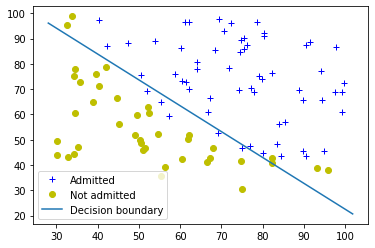

In [ ]:
# positive 그리고 negative 샘플들의 인덱스를 찾습니다. 
pos = np.where(y==1)[0]
neg = np.where(y==0)[0]

# Plot examples
plt.plot(X[pos, 1], X[pos, 2], 'b+', label='Admitted')
plt.plot(X[neg, 1], X[neg, 2], 'yo', label='Not admitted')
plt.legend()

# Plot the decision boundary
plot_x = np.array([min(X[:,1])-2,  max(X[:,1])+2])
plot_y = (-1./theta[2]) * ((theta[1] * (plot_x) + theta[0]))

plt.plot(plot_x, plot_y, label='Decision boundary')

# 범례를 추가합니다.
plt.legend()

## 평가하기

### 한 학생이 합격할 확률 계산하기

In [ ]:
prob = sigmoid(np.array([1, 45, 85]).dot(theta))
print('45점 그리고 85점을 받은 학생은 {:.2}% 의 확률로 합격할 수 있습니다. '.format(prob * 100))

45점 그리고 85점을 받은 학생은 7.8e+01% 의 확률로 합격할 수 있습니다. 


### 정확도 계산

종종 여러분들의 학습된 모델이 얼마나 정확한지 체크하는 것은 중요합니다. 실제 산업군에서는 전체 데이터의 10% ~ 20% 정도를 테스트 데이터로 분류하여, 정확도를 테스트하게 됩니다. 이 데이터는 모델이 학습할 때 한번도 보지못한 데이터여야 합니다. 

아래의 테스트에서는 89.0% 의 정확도가 나와야 합니다.

In [ ]:
p = np.zeros((m, 1))
for (i, example) in enumerate(X):
    prob = sigmoid(np.array(example.dot(theta)))
    if prob >= 0.5:
        p[i] = 1
    else:
        p[i] = 0
print('Training Accuracy: {}%'.format(np.mean(p == y.reshape((m, 1))) * 100))

Training Accuracy: 89.0%
